In [1]:
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [62]:
variables, target  = make_classification(
                    n_samples = 100,
                    n_features = 12,
                    n_informative = 7,
                    n_redundant = 3,
                    n_repeated = 2,
                    n_classes = 4,
                    # Distribution of classes 20% Output1
                    # 20%> output 2, 30% output 3 and 4        
                    weights = [.2,.2, .3, .3],
                    random_state = 32)

In [17]:
df = pd.DataFrame(variables, 
columns=["col_name "+ str(i) for i in range(variables.shape[1])])

In [21]:
df['target'] = pd.DataFrame(target)

In [37]:
# initial dimensionality, size stayed the same
X1 = df[['col_name 0', 'col_name 1', 'col_name 2', 'col_name 3', 'col_name 4', 'col_name 5', 'col_name 6', 'col_name 7', 'col_name 8', 'col_name 9', 'col_name 10', 'col_name 11']]
y1=df['target']
    
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


# initial dimensionality reduced to 9, size stayed the same
X2 = df[['col_name 0', 'col_name 1', 'col_name 2', 'col_name 3', 'col_name 4', 'col_name 5', 'col_name 6', 'col_name 7', 'col_name 8', 'col_name 9']]
y2=df['target']
  
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


# initial dimensionality reduced to 7, size stayed the same
X3 = df[['col_name 0', 'col_name 1', 'col_name 2', 'col_name 3', 'col_name 4', 'col_name 5', 'col_name 6', 'col_name 7']]
y3=df['target']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


In [44]:
df_05 = df.sample(frac=0.5)


In [46]:
# initial dimensionality, size stayed the same
X1_05 = df_05[['col_name 0', 'col_name 1', 'col_name 2', 'col_name 3', 'col_name 4', 'col_name 5', 'col_name 6', 'col_name 7', 'col_name 8', 'col_name 9', 'col_name 10', 'col_name 11']]
y1_05 = df_05['target']
    
X1_05_train, X1_05_test, y1_05_train, y1_05_test = train_test_split(X1_05, y1_05, test_size=0.2, random_state=42)


# initial dimensionality reduced to 9, size stayed the same
X2_05 = df[['col_name 0', 'col_name 1', 'col_name 2', 'col_name 3', 'col_name 4', 'col_name 5', 'col_name 6', 'col_name 7', 'col_name 8', 'col_name 9']]
y2_05=df['target']
  
X2_05_train, X2_05_test, y2_05_train, y2_05_test = train_test_split(X2_05, y2_05, test_size=0.2, random_state=42)


# initial dimensionality reduced to 7, size stayed the same
X3_05 = df[['col_name 0', 'col_name 1', 'col_name 2', 'col_name 3', 'col_name 4', 'col_name 5', 'col_name 6', 'col_name 7']]
y3_05=df['target']

X3_05_train, X3_05_test, y3_05_train, y3_05_test = train_test_split(X3_05, y3_05, test_size=0.2, random_state=42)

In [56]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC    
train_sizes, train_scores, valid_scores = learning_curve(
     SVC(kernel='linear'), X, y, train_sizes=[50, 79], cv=5)

In [53]:
from sklearn.svm import SVC
model.fit(X_train, y_train).score(X_train, y_train)

NameError: name 'model' is not defined

In [3]:
alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_

Optimal regularization parameter : 0.00026529484644318975


In [5]:

n_samples_train, n_samples_test, n_features = 75, 150, 500
X, y, coef = make_regression(
    n_samples=n_samples_train + n_samples_test,
    n_features=n_features,
    n_informative=50,
    shuffle=False,
    noise=1.0,
    coef=True,
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=n_samples_train, test_size=n_samples_test, shuffle=False
)

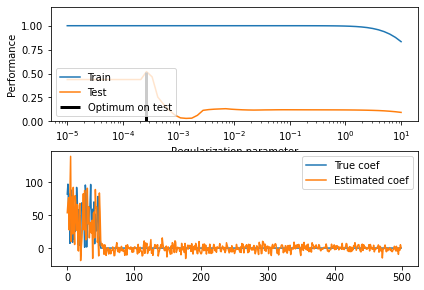

In [11]:
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label="Train")
plt.semilogx(alphas, test_errors, label="Test")
plt.vlines(
    alpha_optim,
    plt.ylim()[0],
    np.max(test_errors),
    color="k",
    linewidth=3,
    label="Optimum on test",
)
plt.legend(loc="lower left")
plt.ylim([0, 1.2])
plt.xlabel("Regularization parameter")
plt.ylabel("Performance")

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label="True coef")
plt.plot(coef_, label="Estimated coef")
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()
